# Project: Behavioral Cloning
- State: This version development was stopped
- Note: The used dataset for now was only the one provided by Udacity. By loading the center, right and left cameras images on the Training / Validation sets, the instance was using around 50% of the available 15GB of memory. After augmenting with image flip for all the set, the model could no longer be trained. Therefore the use of generator was required. Version 2 (02-proj-behaviorlaCloning.ipynb) is now the Mainline.

## Download data


In [2]:
# HMA: Automate data download for AWS spot usage 
# Check / Download / Unzip - Dataset

import os
simulationData_DIR = './00-proj-simulationDataUdacity'
simulationData_ZIP = './00-proj-simulationDataUdacity.zip'

if not(os.path.isdir(simulationData_DIR)):
    if not(os.path.exists(simulationData_ZIP)):
        # Download Dataset zipfile if DIR and ZIP file do not exist
        import urllib.request
        url = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip'
        print("Downloading Simulation Data...")
        urllib.request.urlretrieve(url, simulationData_ZIP)
    
    # Unzip Dataset zipfile
    if (os.path.exists(simulationData_ZIP)):
        print("Unzipping Simulation Data...")
        os.makedirs(simulationData_DIR)
        import zipfile
        zip_ref = zipfile.ZipFile(simulationData_ZIP, 'r')
        zip_ref.extractall(simulationData_DIR)
        zip_ref.close()
print("Dataset ready.")

Dataset ready.


## Import data

In [3]:
# Read log file
# [0] center image
# [1] left image
# [2] right image
# [3] steering angle

import csv

log_DIR = os.path.join(simulationData_DIR, 'data')
log_FILE = 'driving_log.csv'
driving_log = []
with open(os.path.join(log_DIR, log_FILE)) as csvfile:
    reader = csv.reader(csvfile, escapechar=' ')
    for line in reader:
        driving_log.append(line)

driving_log = driving_log[1:] # crop CSV titles
pass

In [4]:
# Declare Input Image Dataset and Label variables

imgSet = []
angleLabel = []

In [5]:
# Function: importImageAngle
# Desc: Import images (input data) and steering angles (associated label)

import cv2
img_DIR = log_DIR
steeringAngleIndex = 3

def importImageAngle(index = 0, deltaAngle = 0.0):
    global imgSet
    global angleLabel
    for log_entry in driving_log:
        img_FILE = log_entry[index]
        img = cv2.imread(os.path.join(img_DIR, img_FILE))
        imgSet.append(img)
        angleLabel.append(float(log_entry[steeringAngleIndex]) + deltaAngle)

Perform steps to augment the training data:
- Use captured images from the left camera with steering angle minus delta as example image to return to the center
- Use captured images from the right camera with steering angle plux delta as example image to return to the center

In [6]:
# Data augmentation - use side camera images with correction angle 
# These extra images seve as situation example to return to the center of the lane

importImageAngle(index = 0, deltaAngle = 0.0)
importImageAngle(index = 1, deltaAngle = -0.15)
importImageAngle(index = 2, deltaAngle = 0.15)

In [7]:
# Data augmentation - use flipped images horizontally

for index in range(len(imgSet)):
    imgSet.append(cv2.flip(imgSet[index], 1))
    angleLabel.append(-angleLabel[index])

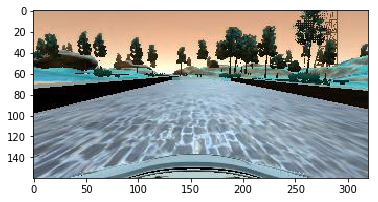

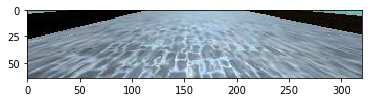

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(imgSet[0])
plt.show()
plt.imshow(imgSet[0][70:135,:])
plt.show()

In [14]:
imgSet[0].shape

(160, 320, 3)

In [9]:
import numpy as np

X_train = np.array(imgSet)
y_train = np.array(angleLabel)

MemoryError: 

## Data augmentation
Perform steps to augment the training data:

- Mirror center, right and left camera images and the related steering angle

## Define Model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Convolution2D

model = Sequential()
#model.add(Cropping2D(cropping=((60,30), (0,0)), input_shape=(160,320,3)))
#model.add(Lambda(lambda x: x / 127.5 - 1.0))
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))
model.add(Convolution2D(24, 5, 5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
#history_object = model.fit_generator(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=2, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=4, verbose=2)
model.save('model.h5')